In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles
figsettings()

# Run calculations

In [49]:
method = 'grad'
d_G_method = get_d_G_grad
N_points = 50
Nset = 50

In [62]:
name, samples = get_samples('gauss_32')
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]
samples['beta_logL'] = get_betas_logL(samples)

In [63]:
iterations = make_iterations(endpoint_true, N_points)
logXs = samples.logX().iloc[iterations]
logXfs, d_Gs = model.inferences(d_G_method, iterations, Nset=Nset)

 Iteration 52289 of 52289, d=33.6

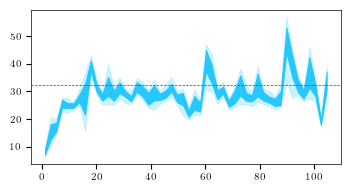

In [64]:
fig, ax = plt.subplots(figsize=(4,2))
plot_quantiles(-logXs, d_Gs, samples.d_G(), ax=ax)

In [66]:
write_to_txt(f'{data_dir}/logXfs/{method}/{name}.txt', [iterations, *logXfs])
write_to_txt(f'{data_dir}/d_Gs/{method}/{name}.txt', [iterations, *d_Gs])

# Plot results

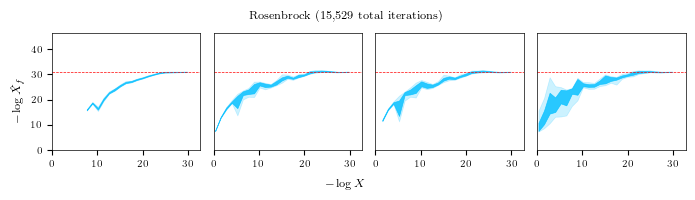

In [216]:
num_chain = 3
ylim = (0, 1.5)

chains = ['gauss_32', 'correlated_6d', 'cauchy_85', 'rosenbrock_10']
chains_titles = ['Gaussian', 'Correlated Gaussian', 'Cauchy', 'Rosenbrock']
chain, chain_title = chains[num_chain], chains_titles[num_chain]
methods = ['term_3', 'grad', 'logL', 'post']
beta_types = ['Termination, $\\epsilon=10^{-3}$', 'Microcanonical', 'Canonical', 'Bayesian']

fig, axs = plt.subplots(1, 4, figsize=(7, 2))
name, samples = get_samples(chain)
model = EndModel(samples)
endpoint_true = model.true_endpoint()
for i, ax in enumerate(axs):
    logXf_true = samples.logX().iloc[endpoint_true]
    iterations, *logXfs = read_from_txt(f'{data_dir}/logXfs/{methods[i]}/{name}.txt')
    logXfs = np.array(logXfs)
    logXs = samples.logX().iloc[iterations]
    plot_quantiles(-logXs, -logXfs, -logXf_true, ylim=ylim, color='deepskyblue', ax=ax)
    ax.set_xlim(0, -logXs.iloc[-1] * 1.1)
    # ax.set_title(beta_types[i], fontsize=6)

for j in range(1, 4):
    axs[j].set_yticks([])

fig.supxlabel('$-\\log X$', y=0.05)
fig.supylabel('$-\\log \\hat{X}_f$')
fig.suptitle(f'{chain_title} ({endpoint_true:,} total iterations)', y=0.95)
fig.tight_layout()
# fig.savefig(f'../figures/beta_comparison_{chain}.pdf', bbox_inches='tight')